In [1]:
# 소비데이터불러오기

# 선언
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [3]:
card = 'data\p_card4.xlsx'

In [4]:
card_df = pd.read_excel(card, sheet_name = '원자료',engine='openpyxl')
card_df.head(1)

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,44936072,38921767,44496876,43591233,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608


In [5]:
len(card_df)

1476

In [6]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 44 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   통계표      1476 non-null   object
 1   지역코드     1476 non-null   object
 2   소비유형코드   1476 non-null   object
 3   금액구분코드   1476 non-null   object
 4   단위       1476 non-null   object
 5   변환       1476 non-null   object
 6   2019/01  1476 non-null   int64 
 7   2019/02  1476 non-null   int64 
 8   2019/03  1476 non-null   int64 
 9   2019/04  1476 non-null   int64 
 10  2019/05  1476 non-null   int64 
 11  2019/06  1476 non-null   int64 
 12  2019/07  1476 non-null   int64 
 13  2019/08  1476 non-null   int64 
 14  2019/09  1476 non-null   int64 
 15  2019/10  1476 non-null   int64 
 16  2019/11  1476 non-null   int64 
 17  2019/12  1476 non-null   int64 
 18  2020/01  1476 non-null   int64 
 19  2020/02  1476 non-null   int64 
 20  2020/03  1476 non-null   int64 
 21  2020/04  1476 non-null   int64 
 22  

In [ ]:
# null 값 확인
# 열별
# card_df.isnull().sum()

In [ ]:
# 행별
# card_df.isnull().sum(1)

In [7]:
# 필요없는 컬럼 삭제

del card_df['통계표']
del card_df['변환'] 
# 단위는 백만원이다.
del card_df['단위'] 
card_df

#두칸 공백이 있으면 소분류이다.

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,298,306,435,326,421,341,254,289,402,301
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11433,11404,12081,10616,11013,10427,9347,10863,9708,9109
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,369,380,390,342,367,336,312,350,313,325
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11466,11373,13168,10204,11005,9802,10007,9944,11564,8890


In [8]:
# 소분류, 대분류 붙이기

merc = list()

for x in range(len(card_df)):
    if len(card_df['소비유형코드'][x].split(' '))==1:
        merc.append('대분류')
    else: 
        merc.append('소분류')
        
merc

['대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',


In [9]:
len(merc)

1476

In [10]:
# 원래 DataFrame에 붙이기
card_df['대소분류구분'] = merc
card_df

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,229936,225889,235818,249490,238870,250262,235457,246281,223755,대분류
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,306,435,326,421,341,254,289,402,301,소분류
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11404,12081,10616,11013,10427,9347,10863,9708,9109,대분류
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,380,390,342,367,336,312,350,313,325,대분류
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11373,13168,10204,11005,9802,10007,9944,11564,8890,대분류


In [11]:
# 전국 데이터로 코로나 전,후 기간 나누기 및 정하기
area_seg = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드=='합계')#특정조건만
card_all = card_df[area_seg]
card_all

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류


In [ ]:
# card_all : 기간별 합계
# case1 : 년도별 합계 -> 연도로 나눈다.

In [12]:
# 2019/01 ~ 2019/12  = [3] ~ [15]  #코로나 전
# 2020/01 ~ 2020/12  = [15] ~ [27] #코로나 기간
# 2021/01 ~ 2021/12  = [27] ~ [39] #코로나 후 +1
# 2022/01 ~ 2022/02  = [39] ~ [41] #코로나 후 +2

# card_all.iloc[:,39:41]

card_all_2019 = card_all.iloc[:,3:15] 
card_all['2019'] = card_all_2019.sum(axis=1)
 
card_all_2020 = card_all.iloc[:,15:27] 
card_all['2020'] = card_all_2020.sum(axis=1)

card_all_2021 = card_all.iloc[:,27:39] 
card_all['2021'] = card_all_2021.sum(axis=1)

card_all_2022 = card_all.iloc[:,39:41] 
card_all['2022'] = card_all_2022.sum(axis=1)

card_all

C:\Users\student\AppData\Local\Temp\ipykernel_3900\858134217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_all['2019'] = card_all_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\858134217.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_all['2020'] = card_all_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\858134217.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,53469616,53827378,53993508,54539492,47029608,대분류,538807655,550072383,605221466,101569100


In [13]:
# 업종 대분류별 증감
# 증감율 : 코로나 1차 (2020년 - 2019년) / 2019년
# 대분류 업종별, 전국 매출액

# 특정조건만, 전국, 총액, 합계 빼고
merc_seg = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='대분류') 

card_merc = card_df[merc_seg]
card_merc

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,11332876,11921832,11762070,11733727,12498677,12988975,13200630,13162164,11902937,대분류
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,843926,852405,921161,1265704,977925,975218,1001439,1285590,798669,대분류
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1031048,952645,847157,1008459,1210118,1139854,1082268,977024,793406,대분류
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2607119,2801180,2728556,2627140,2928012,3007486,3004262,2946530,2632130,대분류
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1328889,1517272,1383383,1184915,1306848,1301222,1152933,1283768,1187513,대분류
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,3825910,3941412,3741396,3549924,4033402,3879853,4095031,4183821,3652065,대분류
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,3055501,3010513,2546455,2322181,2757606,2862530,2996016,2326235,2321611,대분류
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,660371,577479,545371,584841,697987,771992,620872,642424,539946,대분류
62,전국,오락/문화,총액,1190510,1101948,1450682,1369465,1497833,1405616,1386808,...,1427493,1345177,1274088,1369642,1574476,1484822,1272392,1133765,1020406,대분류


In [14]:
card_merc_2019 = card_merc.iloc[:,3:15] 
card_merc['2019'] = card_merc_2019.sum(axis=1)
 
card_merc_2020 = card_merc.iloc[:,15:27] 
card_merc['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = card_merc.iloc[:,27:39] 
card_merc['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = card_merc.iloc[:,39:41] 
card_merc['2022'] = card_merc_2022.sum(axis=1)

card_merc

C:\Users\student\AppData\Local\Temp\ipykernel_3900\3637948679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\3637948679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\3637948679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7404979,7507863,7299173,7634707,6265129,대분류,81715140,79868221,85135882,13899836
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,12498677,12988975,13200630,13162164,11902937,대분류,93396977,116325130,140920641,25065101
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,977925,975218,1001439,1285590,798669,대분류,9245565,10266212,11354587,2084259
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1210118,1139854,1082268,977024,793406,대분류,14010886,11586564,12008740,1770430
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2928012,3007486,3004262,2946530,2632130,대분류,31078595,27031131,32051237,5578660
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1306848,1301222,1152933,1283768,1187513,대분류,15099752,16095290,15790436,2471281
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,4033402,3879853,4095031,4183821,3652065,대분류,41557715,41788064,45243818,7835886
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,2757606,2862530,2996016,2326235,2321611,대분류,28502158,34476890,33732074,4647846
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,697987,771992,620872,642424,539946,대분류,13832202,6606730,7178093,1182370
62,전국,오락/문화,총액,1190510,1101948,1450682,1369465,1497833,1405616,1386808,...,1574476,1484822,1272392,1133765,1020406,대분류,16295958,14126877,15711387,2154171


In [35]:
# 코로나 1차 증감률 선정
card_merc['20증감률'] = ((card_merc['2020']-card_merc['2019'])/card_merc['2019'])*100
card_merc_order = card_merc.sort_values('20증감률')
card_minus_top3 = card_merc_order.head(3) #감소 top3
card_plus_top3 = card_merc_order.tail(3) #증가 top3

C:\Users\student\AppData\Local\Temp\ipykernel_3900\3098150622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['20증감률'] = ((card_merc['2020']-card_merc['2019'])/card_merc['2019'])*100


In [16]:
card_minus_top3

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022,20증감률
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,771992,620872,642424,539946,대분류,13832202,6606730,7178093,1182370,-52.236600
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1139854,1082268,977024,793406,대분류,14010886,11586564,12008740,1770430,-17.303131
68,전국,교육,총액,1138526,1074595,1200939,991952,1134549,1098704,1160300,...,1034652,1076254,1110997,1019333,대분류,13410642,11152757,12573137,2130330,-16.836517


In [17]:
card_plus_top3

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022,20증감률
78,전국,금융/보험,총액,1733680,1605506,1829659,1775080,1828686,1766931,1902882,...,2288994,2411250,2243569,2130398,대분류,21882509,24989934,26883473,4373967,14.200497
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,2862530,2996016,2326235,2321611,대분류,28502158,34476890,33732074,4647846,20.962385
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,12988975,13200630,13162164,11902937,대분류,93396977,116325130,140920641,25065101,24.549138


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


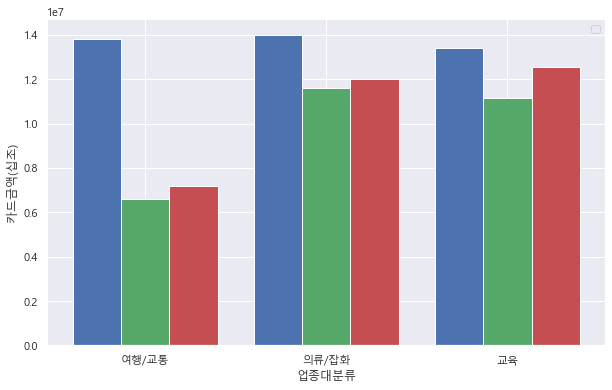

In [18]:
# 감소 top3 대분류 2019,2020,2021 그리기

data = [card_minus_top3['2019'],
        card_minus_top3['2020'],
        card_minus_top3['2021']]

color_list = ['b', 'g', 'r']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)])
    
plt.xlabel('업종대분류')
plt.ylabel('카드금액(십조)')    
plt.legend()

plt.xticks(X + gap, card_minus_top3['소비유형코드'])

plt.show()

In [22]:
# card_minus_top = card_minus_top3
# card_minus_top.drop(columns = ['지역코드','금액구분코드'],inplace=True)
# card_minus_top
# card_minus_top.set_index('소비유형코드', inplace=True)
card_minus_top
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)

,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022,20증감률
소비유형코드,,,,,,,,,,,,,,,,,,,,,
여행/교통,1247162,1047980,1110523,1168304,1188161,1120378,1244302,1141198,1016303,1147293,...,771992,620872,642424,539946,대분류,13832202,6606730,7178093,1182370,-52.236600
의류/잡화,1132901,1001630,1241781,1201059,1317136,1178323,1108101,1020957,1075188,1263757,...,1139854,1082268,977024,793406,대분류,14010886,11586564,12008740,1770430,-17.303131
교육,1138526,1074595,1200939,991952,1134549,1098704,1160300,1260614,1065444,1080319,...,1034652,1076254,1110997,1019333,대분류,13410642,11152757,12573137,2130330,-16.836517


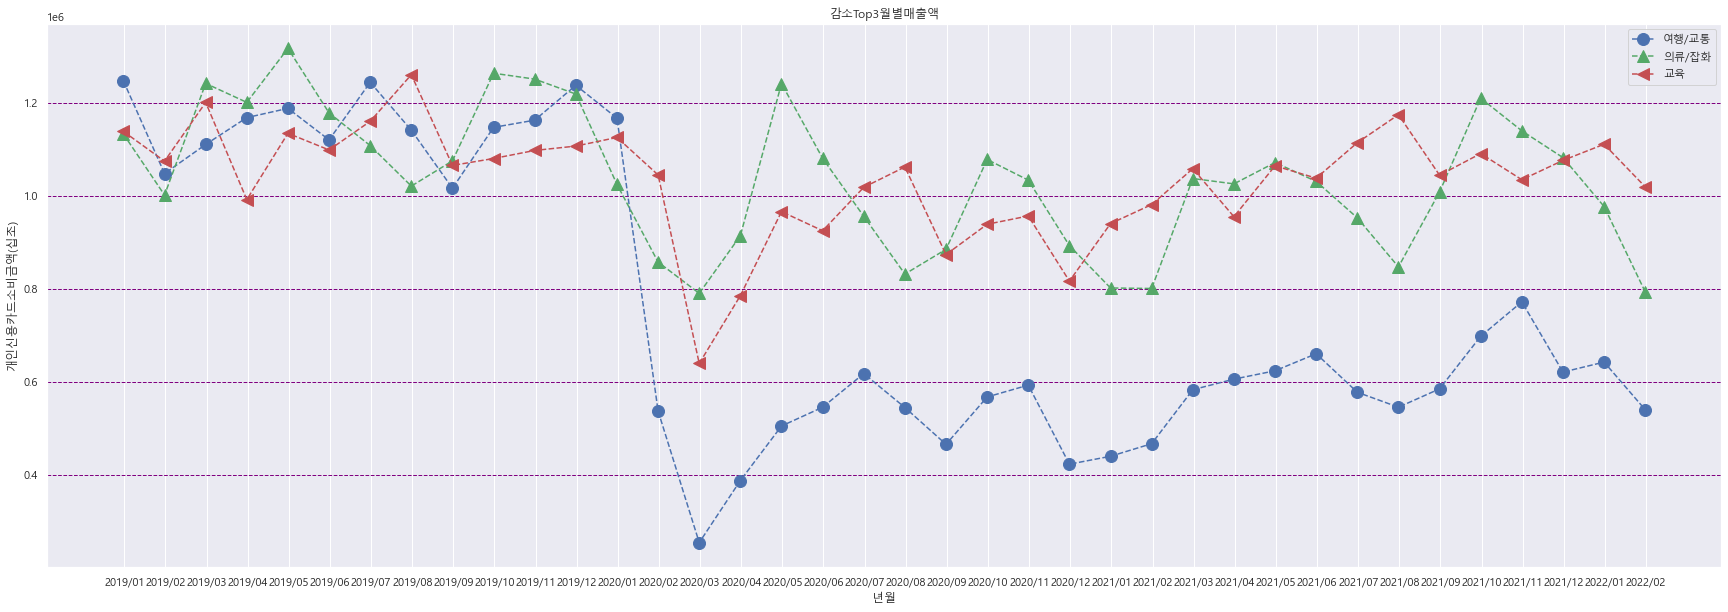

In [23]:
# 감소 대분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = card_minus_top.iloc[:,:38].values

color_list = ['b', 'g', 'r']
maker_list = ['o', '^', '<']

for idx in range(len(card_minus_top)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_minus_top.index[idx])

gap = .8 / len(card_minus_top.iloc[:,:38].columns)

plt.xticks(t + gap, card_minus_top.iloc[:,:38].columns)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(십조)')
plt.title('감소Top3월별매출액')
plt.legend()

plt.show()

In [24]:
card_plus_top3

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022,20증감률
78,전국,금융/보험,총액,1733680,1605506,1829659,1775080,1828686,1766931,1902882,...,2288994,2411250,2243569,2130398,대분류,21882509,24989934,26883473,4373967,14.200497
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,2862530,2996016,2326235,2321611,대분류,28502158,34476890,33732074,4647846,20.962385
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,12988975,13200630,13162164,11902937,대분류,93396977,116325130,140920641,25065101,24.549138


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


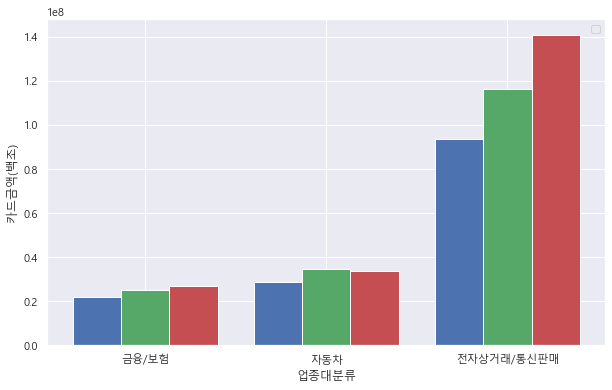

In [25]:
# 증가 top3 대분류 2019,2020,2021 그리기

data = [card_plus_top3['2019'],
        card_plus_top3['2020'],
        card_plus_top3['2021']]

color_list = ['b', 'g', 'r']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)])
    
plt.xlabel('업종대분류')
plt.ylabel('카드금액(백조)')    
plt.legend()

plt.xticks(X + gap, card_plus_top3['소비유형코드'])

plt.show()

In [29]:
# card_plus_top = card_plus_top3
# card_plus_top.drop(columns = ['지역코드','금액구분코드'],inplace=True)
# card_minus_top
# card_plus_top.set_index('소비유형코드', inplace=True)
card_plus_top
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)

,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022,20증감률
소비유형코드,,,,,,,,,,,,,,,,,,,,,
금융/보험,1733680,1605506,1829659,1775080,1828686,1766931,1902882,1842559,1794868,1923089,...,2288994,2411250,2243569,2130398,대분류,21882509,24989934,26883473,4373967,14.200497
자동차,2195702,1956543,2575204,2463015,2478845,2256471,2321229,2283828,2125179,2447276,...,2862530,2996016,2326235,2321611,대분류,28502158,34476890,33732074,4647846,20.962385
전자상거래/통신판매,7595436,6670919,7741855,7495993,7817066,7285161,7836989,7560020,7618476,8192105,...,12988975,13200630,13162164,11902937,대분류,93396977,116325130,140920641,25065101,24.549138


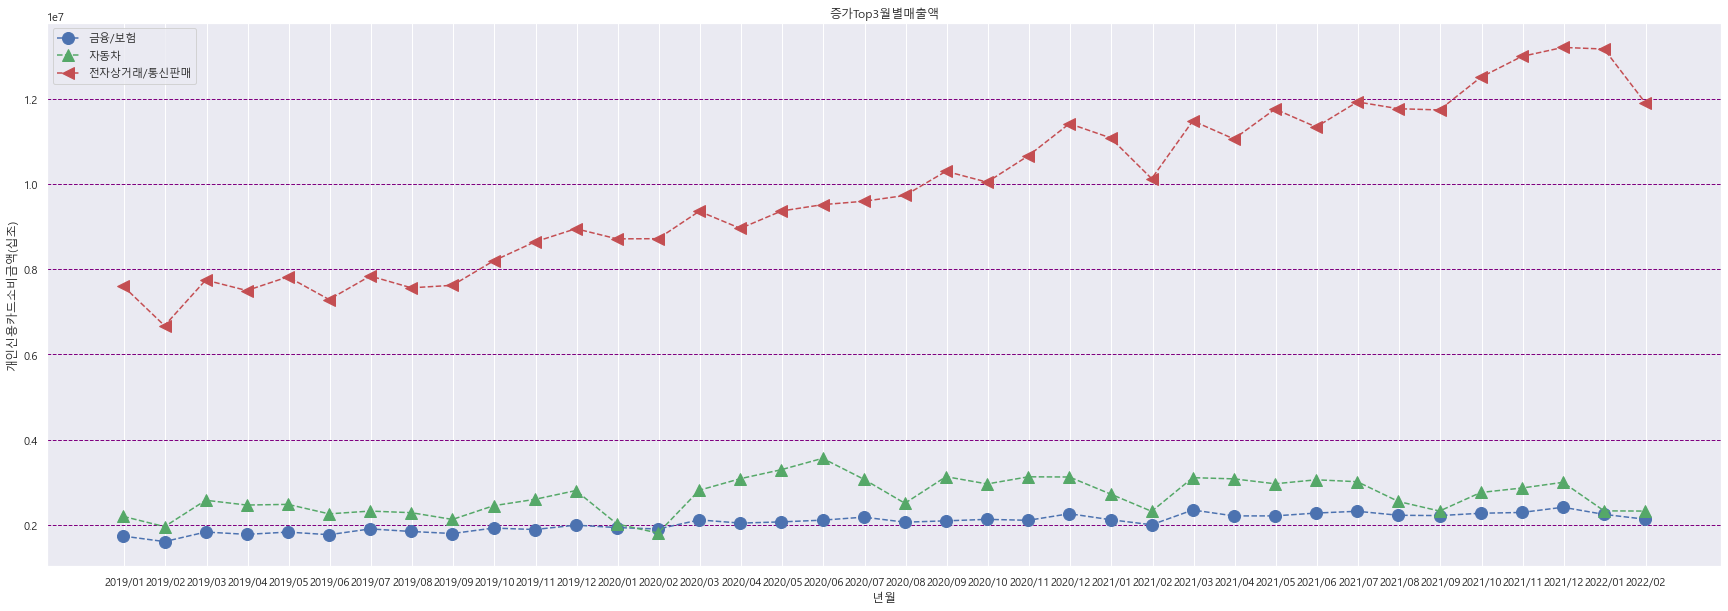

In [30]:
# 증가 대분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = card_plus_top.iloc[:,:38].values

color_list = ['b', 'g', 'r']
maker_list = ['o', '^', '<']

for idx in range(len(card_plus_top)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_plus_top.index[idx])

gap = .8 / len(card_plus_top.iloc[:,:38].columns)

plt.xticks(t + gap, card_plus_top.iloc[:,:38].columns)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(십조)')
plt.title('증가Top3월별매출액')
plt.legend()

plt.show()

In [31]:
# 감소업종 소분류 -> 소분류 data 중 대분류의 index 연속값, 다음 대분류전까지
merc_seg2 = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='소분류') #특정조건만
card_merc2 = card_df[merc_seg2]
card_merc2

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류
6,전국,대형마트/유통전문점,총액,2656679,2402706,2609639,2551294,2790584,2776818,2897975,...,2845178,2968141,3102625,3108158,2928618,2988072,2923811,3165932,2575148,소분류
8,전국,슈퍼마켓,총액,1958044,1746519,1870629,1892572,1969621,1727120,1748047,...,1757707,1856760,1931481,1910003,1763608,1762762,1775922,1942293,1565735,소분류
10,전국,편의점,총액,661708,588642,688378,708420,773933,775828,820703,...,908153,941240,963941,940574,938808,913325,896891,873099,792786,소분류
12,전국,면세점,총액,181505,163259,177788,184414,188463,194646,215363,...,54982,41115,42612,40624,53155,62887,51568,48982,44683,소분류
18,전국,일반식료품,총액,757030,708538,638752,633441,682870,643380,615617,...,784889,791647,864371,1166284,907297,912625,938827,1200656,751097,소분류
20,전국,건강보조식품,총액,81680,70046,64453,64162,78030,65864,63671,...,59037,60757,56790,99421,70628,62593,62612,84934,47572,소분류
24,전국,의복/직물,총액,595790,524598,657957,651190,723368,615586,566552,...,550783,472689,395108,530767,703341,676926,587632,505617,400477,소분류
26,전국,복식잡화,총액,90256,79194,103978,99942,110520,104620,99119,...,95845,91459,83440,91523,107127,99381,99368,89593,73215,소분류
28,전국,시계/귀금속/안경,총액,201638,187289,227925,211259,232816,217216,211331,...,190353,196858,196371,198186,205314,178661,195287,195055,168290,소분류


In [32]:
# for문으로 대분류 소비유형코드 붙이기

merc_dae = list()

for x in range(len(card_df)):
    if card_df['대소분류구분'][x]=='대분류':
        merc_dae.append(card_df['소비유형코드'][x])
    else: 
        merc_dae.append(np.nan)
        
# 오류시 앞의 값으로 채워넣기
card_df['대분류'] = merc_dae
card_df = card_df.fillna(method='ffill')


In [33]:
card_df

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,합계
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류,합계
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,종합소매
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,225889,235818,249490,238870,250262,235457,246281,223755,대분류,종합소매
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,종합소매
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,435,326,421,341,254,289,402,301,소분류,숙박/음식
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,12081,10616,11013,10427,9347,10863,9708,9109,대분류,금융/보험
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,390,342,367,336,312,350,313,325,대분류,금융/보험
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,13168,10204,11005,9802,10007,9944,11564,8890,대분류,기타


In [135]:
# 증가 top3 세부업종

card_df_detail = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='소분류') #특정조건만
card_df_detail = card_df[card_df_detail]
# card_df_detail
plus_top3_merc = card_plus_top3['소비유형코드']
# plus_top3_merc
plus_top3_detail = card_df_detail[card_df_detail['대분류'].isin(plus_top3_merc)]
# plus_top3_detail 
# 금융/보험, 전자상거래/통신판매 상세업종 없음

# card_merc_chk = plus_top3_detail.iloc[:,3:15] 
# card_merc_chk

# 년 합계와 증감률
card_merc_2019 = plus_top3_detail.iloc[:,3:15] 
plus_top3_detail['2019'] = card_merc_2019.sum(axis=1)

card_merc_2020 = plus_top3_detail.iloc[:,15:27] 
plus_top3_detail['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = plus_top3_detail.iloc[:,27:39] 
plus_top3_detail['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = plus_top3_detail.iloc[:,39:41] 
plus_top3_detail['2022'] = card_merc_2022.sum(axis=1)

plus_top3_detail['20증감률'] = ((plus_top3_detail['2020']-plus_top3_detail['2019'])/plus_top3_detail['2019'])*100
plus_top3_detail_order = plus_top3_detail.sort_values('20증감률')
plus_top3_detail_order


C:\Users\student\AppData\Local\Temp\ipykernel_3900\3173281757.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_top3_detail['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\3173281757.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_top3_detail['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\3173281757.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
52,전국,자동차 부품 및 정비,총액,656929,544215,681062,644660,722601,686956,698826,...,829157,735397,567042,소분류,자동차,8225209,8222826,8774448,1302439,-0.028972
50,전국,기타운송수단,총액,114577,109905,149628,131219,144308,143844,136759,...,146693,132037,135860,소분류,자동차,1593976,1764940,2065284,267897,10.725632
48,전국,국산자동차신품,총액,1424196,1302423,1744513,1687136,1611936,1425672,1485645,...,2020166,1458802,1618709,소분류,자동차,18682974,24489123,22892345,3077511,31.077220


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


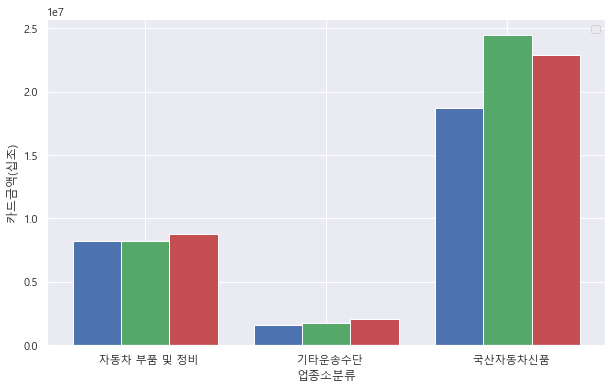

In [129]:
# 증가상세 막대차트로 2019,2020,2021 그리기

data = [plus_top3_detail_order['2019'],
        plus_top3_detail_order['2020'],
        plus_top3_detail_order['2021']]

color_list = ['b', 'g', 'r']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)])
    
plt.xlabel('업종소분류')
plt.ylabel('카드금액(십조)')    
plt.legend()

plt.xticks(X + gap, plus_top3_detail_order['소비유형코드'])

plt.show()

In [134]:
# 증가상세로 월별 그래프
# plus_top3_detail_order2 = plus_top3_detail_order
# plus_top3_detail_order2.drop(columns = ['지역코드','금액구분코드'],inplace=True)
# plus_top3_detail_order2.set_index('소비유형코드', inplace=True)
plus_top3_detail_order2
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)


,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
소비유형코드,,,,,,,,,,,,,,,,,,,,,
자동차 부품 및 정비,656929,544215,681062,644660,722601,686956,698826,739358,640324,727211,...,829157,735397,567042,소분류,자동차,8225209,8222826,8774448,1302439,-0.028972
기타운송수단,114577,109905,149628,131219,144308,143844,136759,135354,121186,131089,...,146693,132037,135860,소분류,자동차,1593976,1764940,2065284,267897,10.725632
국산자동차신품,1424196,1302423,1744513,1687136,1611936,1425672,1485645,1409116,1363670,1588976,...,2020166,1458802,1618709,소분류,자동차,18682974,24489123,22892345,3077511,31.077220


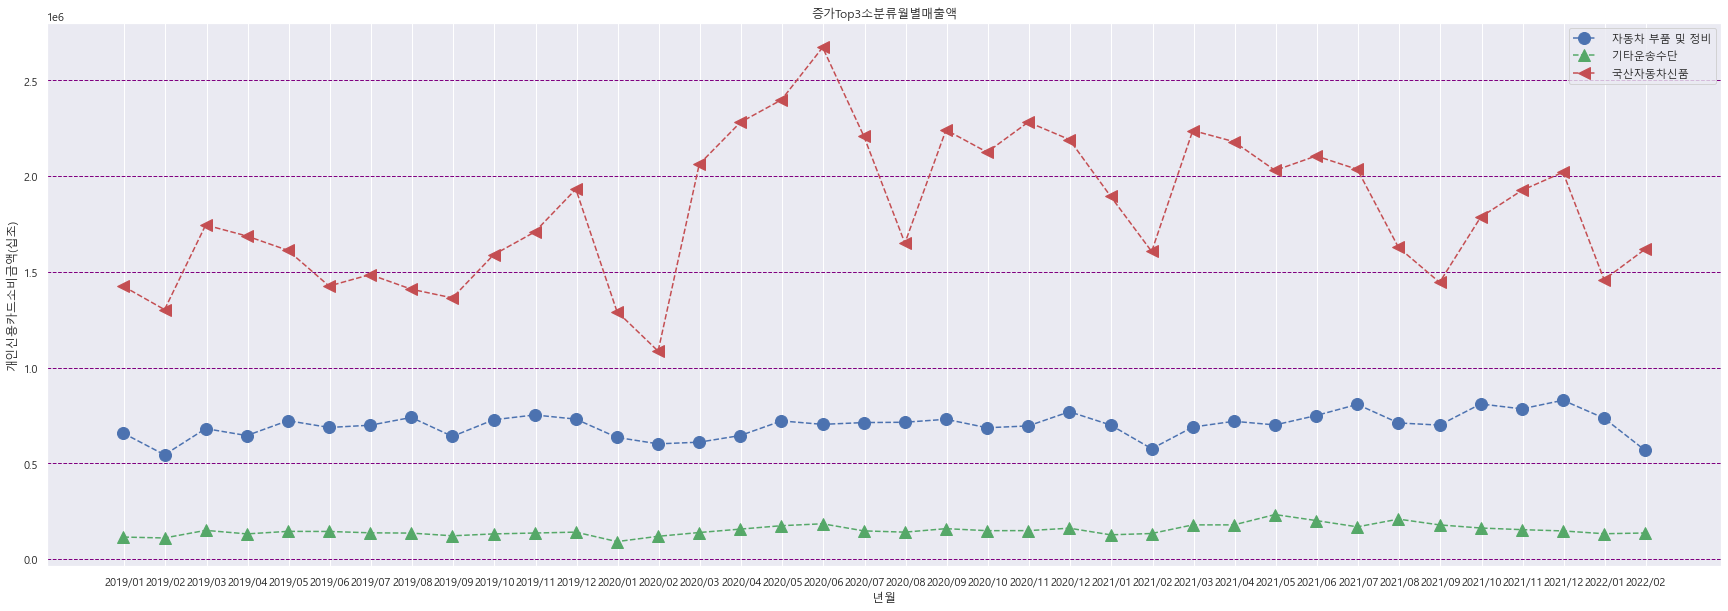

In [88]:
# 증가 소분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = plus_top3_detail_order2.iloc[:,:38].values

color_list = ['b', 'g', 'r']
maker_list = ['o', '^', '<']

for idx in range(len(plus_top3_detail_order2)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=plus_top3_detail_order2.index[idx])

gap = .8 / len(plus_top3_detail_order2.iloc[:,:38].columns)

plt.xticks(t + gap, plus_top3_detail_order2.iloc[:,:38].columns)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(십조)')
plt.title('증가Top3소분류월별매출액')
plt.legend()

plt.show()

In [89]:
# 감소 top3 세부업종
minus_top3_merc = card_minus_top3['소비유형코드']
# minus_top3_merc
minus_top3_detail = card_df_detail[card_df_detail['대분류'].isin(minus_top3_merc)]
minus_top3_detail # 교육상세 없음

# 년 합계와 증감률
card_merc_2019 = minus_top3_detail.iloc[:,3:15] 
minus_top3_detail['2019'] = card_merc_2019.sum(axis=1)

card_merc_2020 = minus_top3_detail.iloc[:,15:27] 
minus_top3_detail['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = minus_top3_detail.iloc[:,27:39] 
minus_top3_detail['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = minus_top3_detail.iloc[:,39:41] 
minus_top3_detail['2022'] = card_merc_2022.sum(axis=1)

minus_top3_detail['20증감률'] = ((minus_top3_detail['2020']-minus_top3_detail['2019'])/minus_top3_detail['2019'])*100
minus_top3_detail_order = minus_top3_detail.sort_values('20증감률')
minus_top3_detail_order


C:\Users\student\AppData\Local\Temp\ipykernel_3900\2175401771.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_top3_detail['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\2175401771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_top3_detail['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\2175401771.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
58,전국,항공사,총액,503956,423982,443476,445981,447640,419248,471606,...,58738,100970,90588,소분류,여행/교통,5100336,687330,1062213,191558,-86.523829
56,전국,여행사/자동차임대,총액,172400,116224,119684,121724,130416,121937,151500,...,39283,41570,37589,소분류,여행/교통,1531625,478723,466608,79159,-68.744112
60,전국,대중교통,총액,570806,507773,547363,600598,610105,579192,621196,...,522851,499884,411769,소분류,여행/교통,7200239,5440675,5649270,911653,-24.437578
24,전국,의복/직물,총액,595790,524598,657957,651190,723368,615586,566552,...,587632,505617,400477,소분류,의류/잡화,7529614,6150161,6404847,906094,-18.320368
30,전국,화장품,총액,245217,210548,251921,238668,250431,240902,231100,...,199981,186759,151425,소분류,의류/잡화,2824093,2349868,2226572,338184,-16.792117
28,전국,시계/귀금속/안경,총액,201638,187289,227925,211259,232816,217216,211331,...,195287,195055,168290,소분류,의류/잡화,2474610,2061175,2281498,363345,-16.707077
26,전국,복식잡화,총액,90256,79194,103978,99942,110520,104620,99119,...,99368,89593,73215,소분류,의류/잡화,1182568,1025358,1095825,162808,-13.293950


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


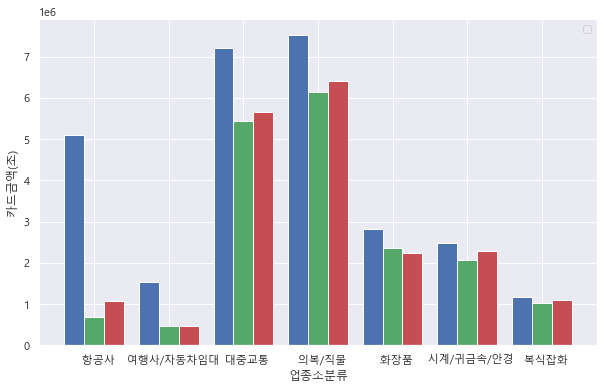

In [44]:
# 감소상세 막대차트로 2019,2020,2021 그리기

data = [minus_top3_detail_order['2019'],
        minus_top3_detail_order['2020'],
        minus_top3_detail_order['2021']]

color_list = ['b', 'g', 'r']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)])
    
plt.xlabel('업종소분류')
plt.ylabel('카드금액(조)')    
plt.legend()

plt.xticks(X + gap, minus_top3_detail_order['소비유형코드'])

plt.show()

In [90]:
# 감소상세로 월별 그래프
# minus_top3_detail_order2 = minus_top3_detail_order
# minus_top3_detail_order2.drop(columns = ['지역코드','금액구분코드'],inplace=True)
# minus_top3_detail_order2.set_index('소비유형코드', inplace=True)
minus_top3_detail_order2
# card_minus_top3.iloc[:,0:38]
# np.arange(38)
# len(card_minus_top3.iloc[:,:38].columns)


,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
소비유형코드,,,,,,,,,,,,,,,,,,,,,
항공사,503956,423982,443476,445981,447640,419248,471606,361569,337016,399623,...,58738,100970,90588,소분류,여행/교통,5100336,687330,1062213,191558,-86.523829
여행사/자동차임대,172400,116224,119684,121724,130416,121937,151500,119734,116155,116019,...,39283,41570,37589,소분류,여행/교통,1531625,478723,466608,79159,-68.744112
대중교통,570806,507773,547363,600598,610105,579192,621196,659895,563133,631651,...,522851,499884,411769,소분류,여행/교통,7200239,5440675,5649270,911653,-24.437578
의복/직물,595790,524598,657957,651190,723368,615586,566552,481348,583837,724413,...,587632,505617,400477,소분류,의류/잡화,7529614,6150161,6404847,906094,-18.320368
화장품,245217,210548,251921,238668,250431,240902,231100,233112,215136,235934,...,199981,186759,151425,소분류,의류/잡화,2824093,2349868,2226572,338184,-16.792117
시계/귀금속/안경,201638,187289,227925,211259,232816,217216,211331,215308,185643,198534,...,195287,195055,168290,소분류,의류/잡화,2474610,2061175,2281498,363345,-16.707077
복식잡화,90256,79194,103978,99942,110520,104620,99119,91188,90571,104876,...,99368,89593,73215,소분류,의류/잡화,1182568,1025358,1095825,162808,-13.293950


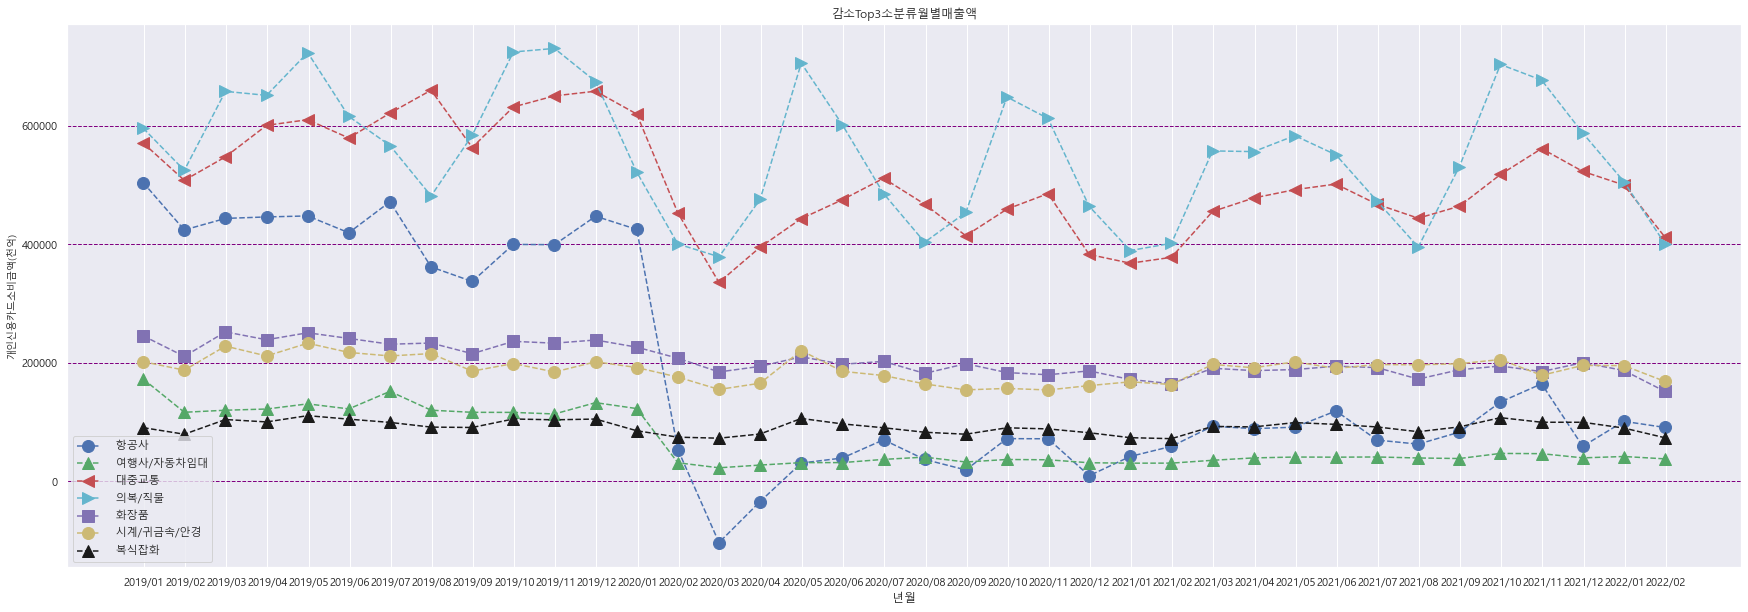

In [91]:
# 감소 소분류 top3 월별 매출액 그리기
plt.figure(figsize=(30,10))

t = np.arange(38)
y = minus_top3_detail_order2.iloc[:,:38].values

color_list = ['b', 'g', 'r', 'c', 'm','y','k']
maker_list = ['o', '^', '<', '>', 's']

for idx in range(len(minus_top3_detail_order2)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=minus_top3_detail_order2.index[idx])

gap = .8 / len(minus_top3_detail_order2.iloc[:,:38].columns)

plt.xticks(t + gap, minus_top3_detail_order2.iloc[:,:38].columns)
# plt.yticks(labelsize=10)

plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('개인신용카드소비금액(천억)',fontsize=10)

# plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=20)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기

plt.title('감소Top3소분류월별매출액')
plt.legend()

plt.show()

In [92]:
# subplot는 최종에 한다.
# 업종별 전년동월대비 증감률
# 전년동월대비 한국은행통계사이트이용

card_df2 = pd.read_excel(card, sheet_name = '전년동기대비증감률',engine='openpyxl')
card_df2.head(1)

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,%,전년동기대비증감률,9.8,5.8,7.1,6.8,...,9.2,8.2,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8


In [93]:
del card_df2['통계표']
del card_df2['변환'] # 단위는 백만원이다.
del card_df2['단위'] 
card_df2

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,전국,합계,총액,9.8,5.8,7.1,6.8,8.0,6.6,4.5,...,9.2,8.2,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8
1,전국,합계,월간 일평균,9.8,5.8,7.1,6.8,8.0,6.6,4.5,...,9.2,8.2,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8
2,전국,종합소매,총액,4.8,-2.2,5.3,1.6,3.3,3.0,-2.0,...,7.7,3.2,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6
3,전국,종합소매,월간 일평균,4.8,-2.2,5.3,1.6,3.3,3.0,-2.0,...,7.7,3.2,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6
4,전국,백화점,총액,3.2,-0.2,8.5,-2.5,3.7,7.8,-2.5,...,16.9,4.4,4.9,12.7,23.4,19.5,16.3,37.4,39.9,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,9.2,7.5,6.5,2.4,41.6,-4.0,-9.0,...,-6.3,-3.2,-11.6,-8.7,-1.9,-16.0,-13.3,-5.2,8.1,-10.9
1472,기타,금융/보험,총액,18.9,19.7,12.8,7.9,8.3,1.2,-0.9,...,-14.8,-5.8,-8.7,-11.6,-4.1,-17.4,-19.8,-13.2,-20.3,-11.5
1473,기타,금융/보험,월간 일평균,18.8,19.6,12.8,7.9,8.2,1.1,-0.9,...,-14.8,-5.9,-8.7,-11.6,-4.2,-17.4,-19.8,-13.4,-20.4,-11.7
1474,기타,기타,총액,20.4,13.4,14.4,3.4,5.7,6.9,1.9,...,-1.4,1.7,-4.7,-14.4,-3.0,-23.4,-11.7,-5.0,12.7,-10.8


In [94]:
# 소분류, 대분류 구분 붙이기

merc = list()

for x in range(len(card_df2)):
    if len(card_df2['소비유형코드'][x].split(' '))==1:
        merc.append('대분류')
    else: 
        merc.append('소분류')

In [95]:
# 원래 DataFrame에 붙이기
card_df2['대소분류구분'] = merc
card_df2

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,9.8,5.8,7.1,6.8,8.0,6.6,4.5,...,8.2,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8,대분류
1,전국,합계,월간 일평균,9.8,5.8,7.1,6.8,8.0,6.6,4.5,...,8.2,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8,대분류
2,전국,종합소매,총액,4.8,-2.2,5.3,1.6,3.3,3.0,-2.0,...,3.2,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6,대분류
3,전국,종합소매,월간 일평균,4.8,-2.2,5.3,1.6,3.3,3.0,-2.0,...,3.2,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6,대분류
4,전국,백화점,총액,3.2,-0.2,8.5,-2.5,3.7,7.8,-2.5,...,4.4,4.9,12.7,23.4,19.5,16.3,37.4,39.9,7.3,소분류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,9.2,7.5,6.5,2.4,41.6,-4.0,-9.0,...,-3.2,-11.6,-8.7,-1.9,-16.0,-13.3,-5.2,8.1,-10.9,소분류
1472,기타,금융/보험,총액,18.9,19.7,12.8,7.9,8.3,1.2,-0.9,...,-5.8,-8.7,-11.6,-4.1,-17.4,-19.8,-13.2,-20.3,-11.5,대분류
1473,기타,금융/보험,월간 일평균,18.8,19.6,12.8,7.9,8.2,1.1,-0.9,...,-5.9,-8.7,-11.6,-4.2,-17.4,-19.8,-13.4,-20.4,-11.7,대분류
1474,기타,기타,총액,20.4,13.4,14.4,3.4,5.7,6.9,1.9,...,1.7,-4.7,-14.4,-3.0,-23.4,-11.7,-5.0,12.7,-10.8,대분류


In [96]:
# for문으로 대분류 소비유형코드 붙이기

merc_dae = list()

for x in range(len(card_df2)):
    if card_df2['대소분류구분'][x]=='대분류':
        merc_dae.append(card_df2['소비유형코드'][x])
    else: 
        merc_dae.append(np.nan)
        
# 오류시 앞의 값으로 채워넣기
card_df2['대분류'] = merc_dae
card_df2 = card_df2.fillna(method='ffill')

In [97]:
card_df2

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
0,전국,합계,총액,9.8,5.8,7.1,6.8,8.0,6.6,4.5,...,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8,대분류,합계
1,전국,합계,월간 일평균,9.8,5.8,7.1,6.8,8.0,6.6,4.5,...,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8,대분류,합계
2,전국,종합소매,총액,4.8,-2.2,5.3,1.6,3.3,3.0,-2.0,...,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6,대분류,종합소매
3,전국,종합소매,월간 일평균,4.8,-2.2,5.3,1.6,3.3,3.0,-2.0,...,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6,대분류,종합소매
4,전국,백화점,총액,3.2,-0.2,8.5,-2.5,3.7,7.8,-2.5,...,4.9,12.7,23.4,19.5,16.3,37.4,39.9,7.3,소분류,종합소매
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,9.2,7.5,6.5,2.4,41.6,-4.0,-9.0,...,-11.6,-8.7,-1.9,-16.0,-13.3,-5.2,8.1,-10.9,소분류,숙박/음식
1472,기타,금융/보험,총액,18.9,19.7,12.8,7.9,8.3,1.2,-0.9,...,-8.7,-11.6,-4.1,-17.4,-19.8,-13.2,-20.3,-11.5,대분류,금융/보험
1473,기타,금융/보험,월간 일평균,18.8,19.6,12.8,7.9,8.2,1.1,-0.9,...,-8.7,-11.6,-4.2,-17.4,-19.8,-13.4,-20.4,-11.7,대분류,금융/보험
1474,기타,기타,총액,20.4,13.4,14.4,3.4,5.7,6.9,1.9,...,-4.7,-14.4,-3.0,-23.4,-11.7,-5.0,12.7,-10.8,대분류,기타


In [98]:
# 전국 데이터, 전체
area_seg = (card_df2.지역코드=='전국') & (card_df2.금액구분코드=='총액') & (card_df2.소비유형코드=='합계')#특정조건만
card_all_var = card_df2[area_seg]
card_all_var

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
0,전국,합계,총액,9.8,5.8,7.1,6.8,8.0,6.6,4.5,...,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8,대분류,합계


In [99]:
# 20년도부터 ~ 22년도 2월
card_all_var = card_all_var.iloc[:,15:41]
card_all_var

,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,5.3,6.0,-5.8,-1.2,1.8,6.4,3.5,2.4,7.3,1.5,...,9.2,8.2,10.0,8.0,7.6,13.0,12.9,15.2,17.9,6.8


C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


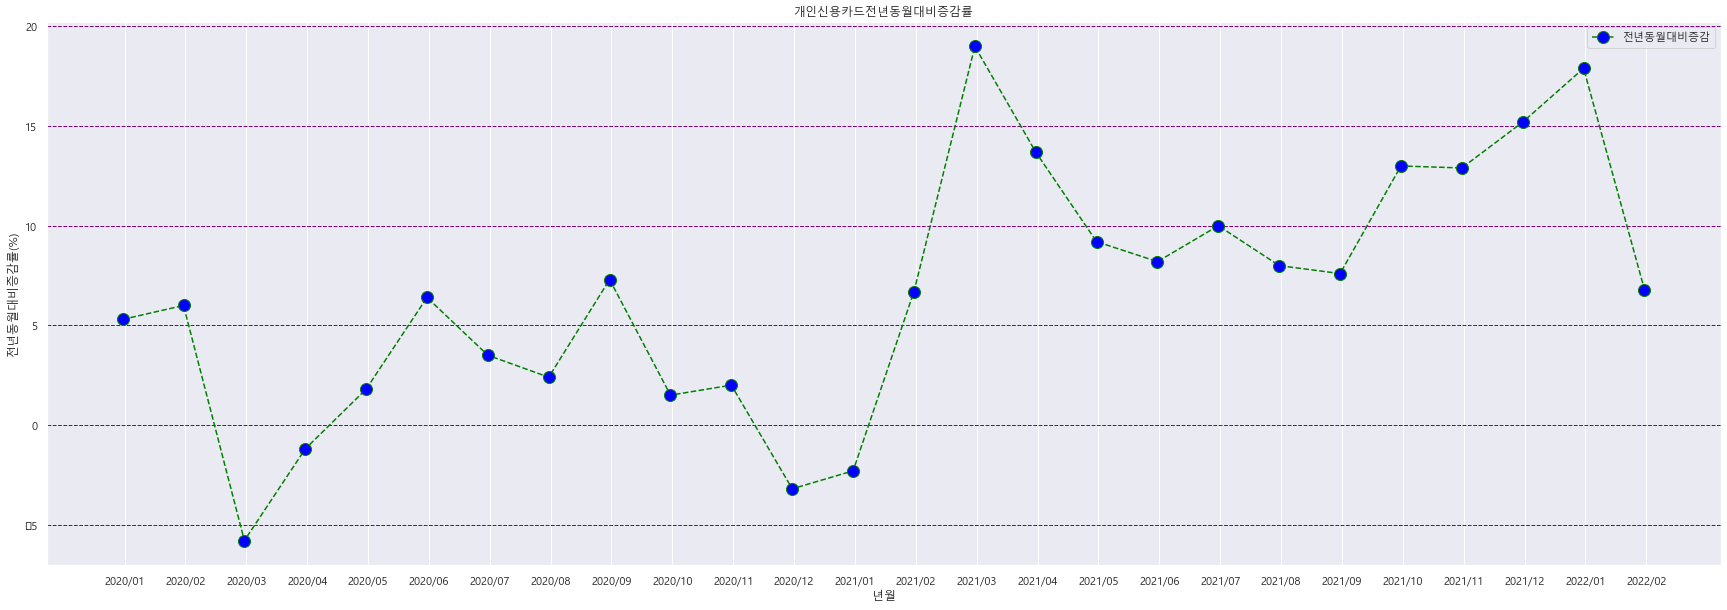

In [100]:
# 선그래프

plt.figure(figsize=(30,10))

t = np.arange(26)
y = card_all_var.iloc[0,:].values

plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12 ,label='전년동월대비증감')

gap = .8 / len(y)

plt.xticks(t + gap, card_all_var.iloc[0,:].index)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('전년동월대비증감률(%)')
plt.title('개인신용카드전년동월대비증감률')
plt.legend()

plt.show()


In [101]:
# 대분류 업종별 
merc_seg = (card_df2.지역코드=='전국') & (card_df2.금액구분코드=='총액') & (card_df2.소비유형코드!='합계') & (card_df2.대소분류구분=='대분류') #특정조건만
card_merc_var = card_df2[merc_seg]
card_merc_var.head(1)

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
2,전국,종합소매,총액,4.8,-2.2,5.3,1.6,3.3,3.0,-2.0,...,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6,대분류,종합소매


In [102]:
# 19년도 컬럼삭제
# card_merc_var.iloc[:,3:15].columns
card_merc_var.drop(columns=card_merc_var.iloc[:,3:15].columns, inplace=True)

# 전국, 총액 삭제
# card_merc_var.iloc[:,3:15].columns
card_merc_var.drop(columns=['지역코드','금액구분코드'], inplace=True)

card_merc_var
# card_merc_var.iloc[:,3:].columns
# card_merc_var.iloc[:,3:].values

C:\Users\student\AppData\Local\Temp\ipykernel_3900\1386444403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc_var.drop(columns=card_merc_var.iloc[:,3:15].columns, inplace=True)
C:\Users\student\AppData\Local\Temp\ipykernel_3900\1386444403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc_var.drop(columns=['지역코드','금액구분코드'], inplace=True)


,소비유형코드,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
2,종합소매,4.6,-5.9,-7.4,-6.7,-2.9,-0.1,-6.9,0.2,-0.9,...,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6,대분류,종합소매
14,전자상거래/통신판매,14.7,30.6,20.9,19.4,19.8,30.6,22.4,28.7,35.1,...,24.3,20.9,14.0,24.5,21.9,15.7,18.8,17.6,대분류,전자상거래/통신판매
16,식료품,25.9,-13.0,9.8,12.9,20.1,4.9,12.3,8.5,14.8,...,11.8,12.9,15.7,11.3,13.2,10.9,42.3,-19.4,대분류,식료품
22,의류/잡화,-9.6,-14.4,-36.4,-23.9,-5.7,-8.3,-13.7,-18.5,-17.7,...,-0.3,1.9,14.0,12.2,10.3,21.2,21.9,-0.9,대분류,의류/잡화
32,연료,8.8,9.0,-7.6,-15.4,-24.5,-18.5,-14.5,-18.7,-13.7,...,27.7,22.1,21.6,34.1,36.6,30.3,25.9,16.3,대분류,연료
34,가구/가전,-3.9,3.9,-11.3,-0.5,8.2,26.3,3.1,22.4,15.3,...,12.0,-12.0,-9.1,6.3,-4.9,-5.2,-7.0,-2.2,대분류,가구/가전
40,의료/보건,2.5,12.9,-11.0,-0.8,-0.2,3.4,5.1,-3.2,13.1,...,7.4,8.8,-0.5,20.0,13.1,11.5,13.7,9.9,대분류,의료/보건
46,자동차,-8.1,-7.7,9.1,25.1,32.9,57.7,32.2,9.7,47.2,...,-1.9,1.7,-25.8,-6.8,-8.4,-4.0,-14.5,0.3,대분류,자동차
54,여행/교통,-6.4,-48.8,-77.1,-66.8,-57.5,-51.3,-50.4,-52.3,-54.2,...,-6.5,0.1,25.7,23.0,30.2,46.8,46.1,15.7,대분류,여행/교통
62,오락/문화,-0.4,-11.7,-33.2,-16.8,-2.1,-6.2,-8.7,-13.8,-17.3,...,6.2,8.1,27.4,13.1,15.9,44.6,45.0,6.6,대분류,오락/문화


In [103]:
# set_index
card_merc_var.set_index(keys='소비유형코드',inplace=True)
card_merc_var.head(2)

,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
소비유형코드,,,,,,,,,,,,,,,,,,,,,
종합소매,4.6,-5.9,-7.4,-6.7,-2.9,-0.1,-6.9,0.2,-0.9,1.1,...,9.0,5.8,5.0,7.0,7.1,7.3,14.9,-2.6,대분류,종합소매
전자상거래/통신판매,14.7,30.6,20.9,19.4,19.8,30.6,22.4,28.7,35.1,22.5,...,24.3,20.9,14.0,24.5,21.9,15.7,18.8,17.6,대분류,전자상거래/통신판매


C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


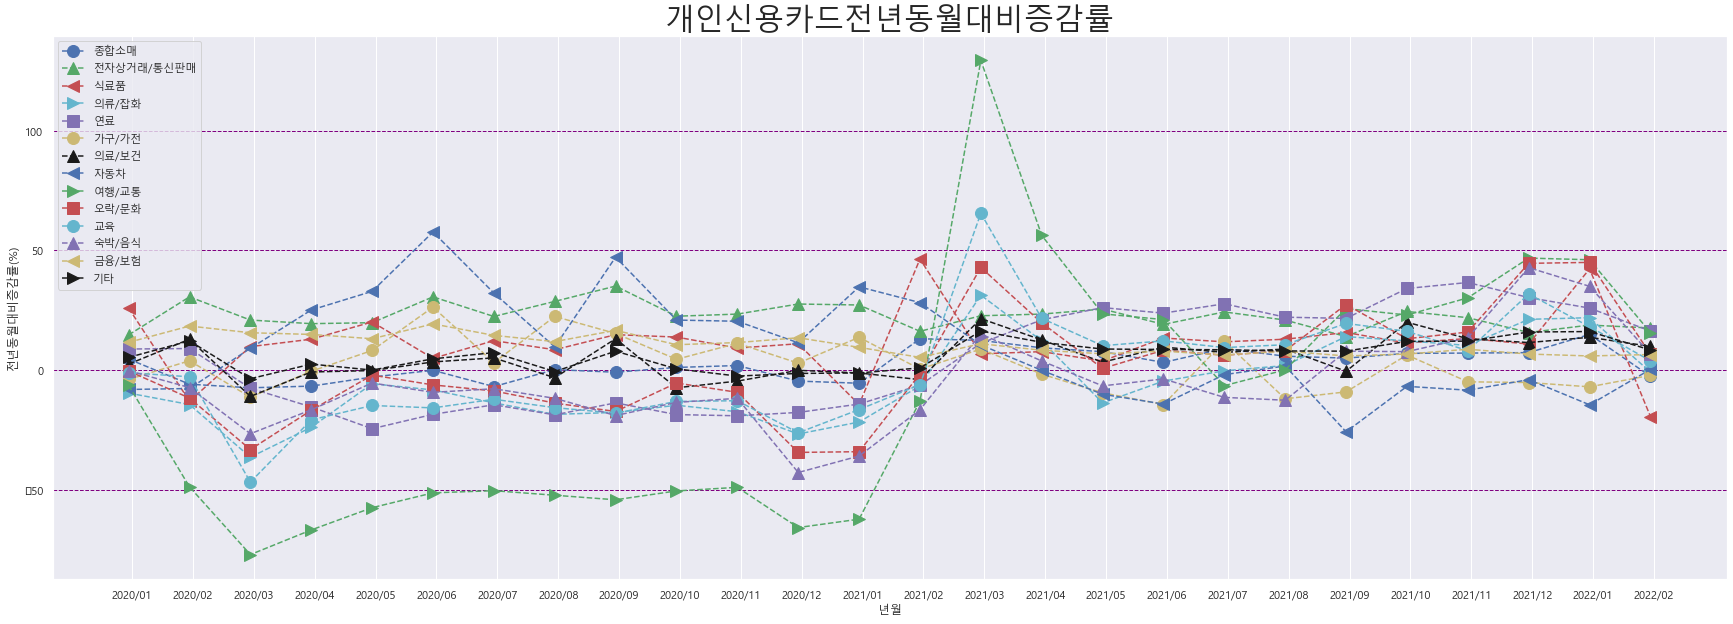

In [104]:
# 선그래프

plt.figure(figsize=(30,10))

t = np.arange(26)
y = card_merc_var.iloc[:,:26].values

color_list = ['b', 'g', 'r', 'c', 'm','y','k']
maker_list = ['o', '^', '<', '>', 's']

for idx in range(len(card_merc_var)):
    
    plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
            markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_merc_var.index[idx])

gap = .8 / len(y)

plt.xticks(t + gap, card_merc_var.iloc[:,:26].columns)
plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

plt.xlabel('년월')
plt.ylabel('전년동월대비증감률(%)')
plt.title('개인신용카드전년동월대비증감률', fontsize=30)
plt.legend()

plt.show()


In [136]:
# 최종 테이블 구조 확인
# card_plus_top3 #문제
# card_minus_top3
# card_plus_top 
# card_minus_top
# plus_top3_detail_order #문제
# minus_top3_detail_order
# plus_top3_detail_order2
# minus_top3_detail_order2
# card_all_var
# card_merc_var


,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
52,전국,자동차 부품 및 정비,총액,656929,544215,681062,644660,722601,686956,698826,...,829157,735397,567042,소분류,자동차,8225209,8222826,8774448,1302439,-0.028972
50,전국,기타운송수단,총액,114577,109905,149628,131219,144308,143844,136759,...,146693,132037,135860,소분류,자동차,1593976,1764940,2065284,267897,10.725632
48,전국,국산자동차신품,총액,1424196,1302423,1744513,1687136,1611936,1425672,1485645,...,2020166,1458802,1618709,소분류,자동차,18682974,24489123,22892345,3077511,31.077220


In [137]:
# 그림 subplot로 만들기
# 함수로 대분류 증가 y/n, 소분류 증가 y/n, 전체 전년동월대비 증가율, 업종별 증가율 총 6개
# 대분류 증가 y/n

def draw_merc(plus):
    if plus=='y':
    
        data = [card_plus_top3['2019'],
                card_plus_top3['2020'],
                card_plus_top3['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']
        
        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종대분류')
        plt.ylabel('카드금액(백조)')    
        plt.legend()
        plt.title('증가Top3업종연도별', fontsize=15)
        plt.xticks(X + gap, card_plus_top3['소비유형코드'])

#         plt.show()
    elif plus=='n':
        
        data = [card_minus_top3['2019'],
        card_minus_top3['2020'],
        card_minus_top3['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']

        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종대분류')
        plt.ylabel('카드금액(십조)')    
        plt.legend()
        plt.title('감소Top3업종연도별', fontsize=15)
        plt.xticks(X + gap, card_minus_top3['소비유형코드'])

#         plt.show()
    else:
        print("Not Operation !!")
        return

In [138]:
def draw_merc_mon(plus):
    if plus=='y':
        t = np.arange(38)
        y = card_plus_top.iloc[:,:38].values

        color_list = ['b', 'g', 'r']
        maker_list = ['o', '^', '<']

        for idx in range(len(card_plus_top)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_plus_top.index[idx])

        gap = .8 / len(card_plus_top.iloc[:,:38].columns)

        plt.xticks(t + gap, card_plus_top.iloc[:,:38].columns)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(십조)')
        plt.title('증가Top3월별매출액',fontsize=15)
        plt.legend()
        
    elif plus=='n':
        
        t = np.arange(38)
        y = card_minus_top.iloc[:,:38].values

        color_list = ['b', 'g', 'r']
        maker_list = ['o', '^', '<']

        for idx in range(len(card_minus_top)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_minus_top.index[idx])

        gap = .8 / len(card_minus_top.iloc[:,:38].columns)

        plt.xticks(t + gap, card_minus_top.iloc[:,:38].columns)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(십조)')
        plt.title('감소Top3월별매출액',fontsize=15)
        plt.legend()
    
    else:
        print("Not Operation !!")
        return

In [139]:
def draw_merc_detail(plus):
    if plus=='y':
        
        data = [plus_top3_detail_order['2019'],
        plus_top3_detail_order['2020'],
        plus_top3_detail_order['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']
        
        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종소분류')
        plt.ylabel('카드금액(십조)')    
        plt.legend()
        plt.title('증가Top3소분류업종연도별', fontsize=15)
        plt.xticks(X + gap, plus_top3_detail_order['소비유형코드'])

    elif plus=='n':        
        # 감소상세 막대차트로 2019,2020,2021 그리기
        data = [minus_top3_detail_order['2019'],
                minus_top3_detail_order['2020'],
                minus_top3_detail_order['2021']]

        color_list = ['b', 'g', 'r']
        label_list = ['2019', '2020', '2021']
                                      
        gap = .8 / len(data)
        for i, row in enumerate(data):
            X = np.arange(len(row))
            plt.bar(X + i*gap, row, 
                   width = gap, 
                   color = color_list[i % len(color_list)],
                   label = label_list[i % len(label_list)])

        plt.xlabel('업종소분류')
        plt.ylabel('카드금액(조)')    
        plt.legend()
        plt.title('감소Top3소분류업종연도별', fontsize=15)
        plt.xticks(X + gap, minus_top3_detail_order['소비유형코드'])
    else:
        print("Not Operation !!")
        return        

In [140]:
def draw_merc_detail_mon(plus):
    if plus=='y':
        t = np.arange(38)
        y = plus_top3_detail_order2.iloc[:,:38].values

        color_list = ['b', 'g', 'r']
        maker_list = ['o', '^', '<']

        for idx in range(len(plus_top3_detail_order2)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=plus_top3_detail_order2.index[idx])

        gap = .8 / len(plus_top3_detail_order2.iloc[:,:38].columns)

        plt.xticks(t + gap, plus_top3_detail_order2.iloc[:,:38].columns)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(십조)')
        plt.title('증가Top3소분류월별매출액',fontsize=15)
        plt.legend()
        
    elif plus=='n':
        
        t = np.arange(38)
        y = minus_top3_detail_order2.iloc[:,:38].values

        color_list = ['b', 'g', 'r', 'c', 'm','y','k']
        maker_list = ['o', '^', '<', '>', 's']

        for idx in range(len(minus_top3_detail_order2)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=minus_top3_detail_order2.index[idx])

        gap = .8 / len(minus_top3_detail_order2.iloc[:,:38].columns)

        plt.xticks(t + gap, minus_top3_detail_order2.iloc[:,:38].columns)
        # plt.yticks(labelsize=10)

        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('개인신용카드소비금액(천억)',fontsize=15)
        plt.title('감소Top3소분류월별매출액')
        plt.legend(loc=2,ncol=7)
        
    else:
        print("Not Operation !!")
        return   

In [141]:
def draw_yty(merc):
    if merc=='n':
        t = np.arange(26)
        y = card_all_var.iloc[0,:].values

        plt.plot(t, y, color='green', linestyle='dashed', marker='o',
                markerfacecolor = 'blue', markersize=12 ,label='개인신용카드')

        gap = .8 / len(y)

        plt.xticks(t + gap, card_all_var.iloc[0,:].index)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('전년동월대비증감률(%)')
        plt.title('개인신용카드전년동월대비증감률', fontsize=15)
        plt.legend()
        
    elif merc=='y':
        t = np.arange(26)
        y = card_merc_var.iloc[:,:26].values

        color_list = ['b', 'g', 'r', 'c', 'm','y','k']
        maker_list = ['o', '^', '<', '>', 's']

        for idx in range(len(card_merc_var)):

            plt.plot(t, y[idx], color = color_list[idx % len(color_list)], linestyle='dashed', marker=maker_list[idx % len(maker_list)],
                    markerfacecolor = color_list[idx % len(color_list)], markersize=12 ,label=card_merc_var.index[idx])

        gap = .8 / len(y)

        plt.xticks(t + gap, card_merc_var.iloc[:,:26].columns)
        plt.grid(True, axis = 'y',color = 'purple', linestyle = '--', linewidth = 1)

        plt.xlabel('년월')
        plt.ylabel('전년동월대비증감률(%)')
        plt.title('개인신용카드전년동월대비증감률', fontsize=15)
        plt.legend(loc=2, ncol=5)
        
    else:
        print("Not Operation !!")
        return        

C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


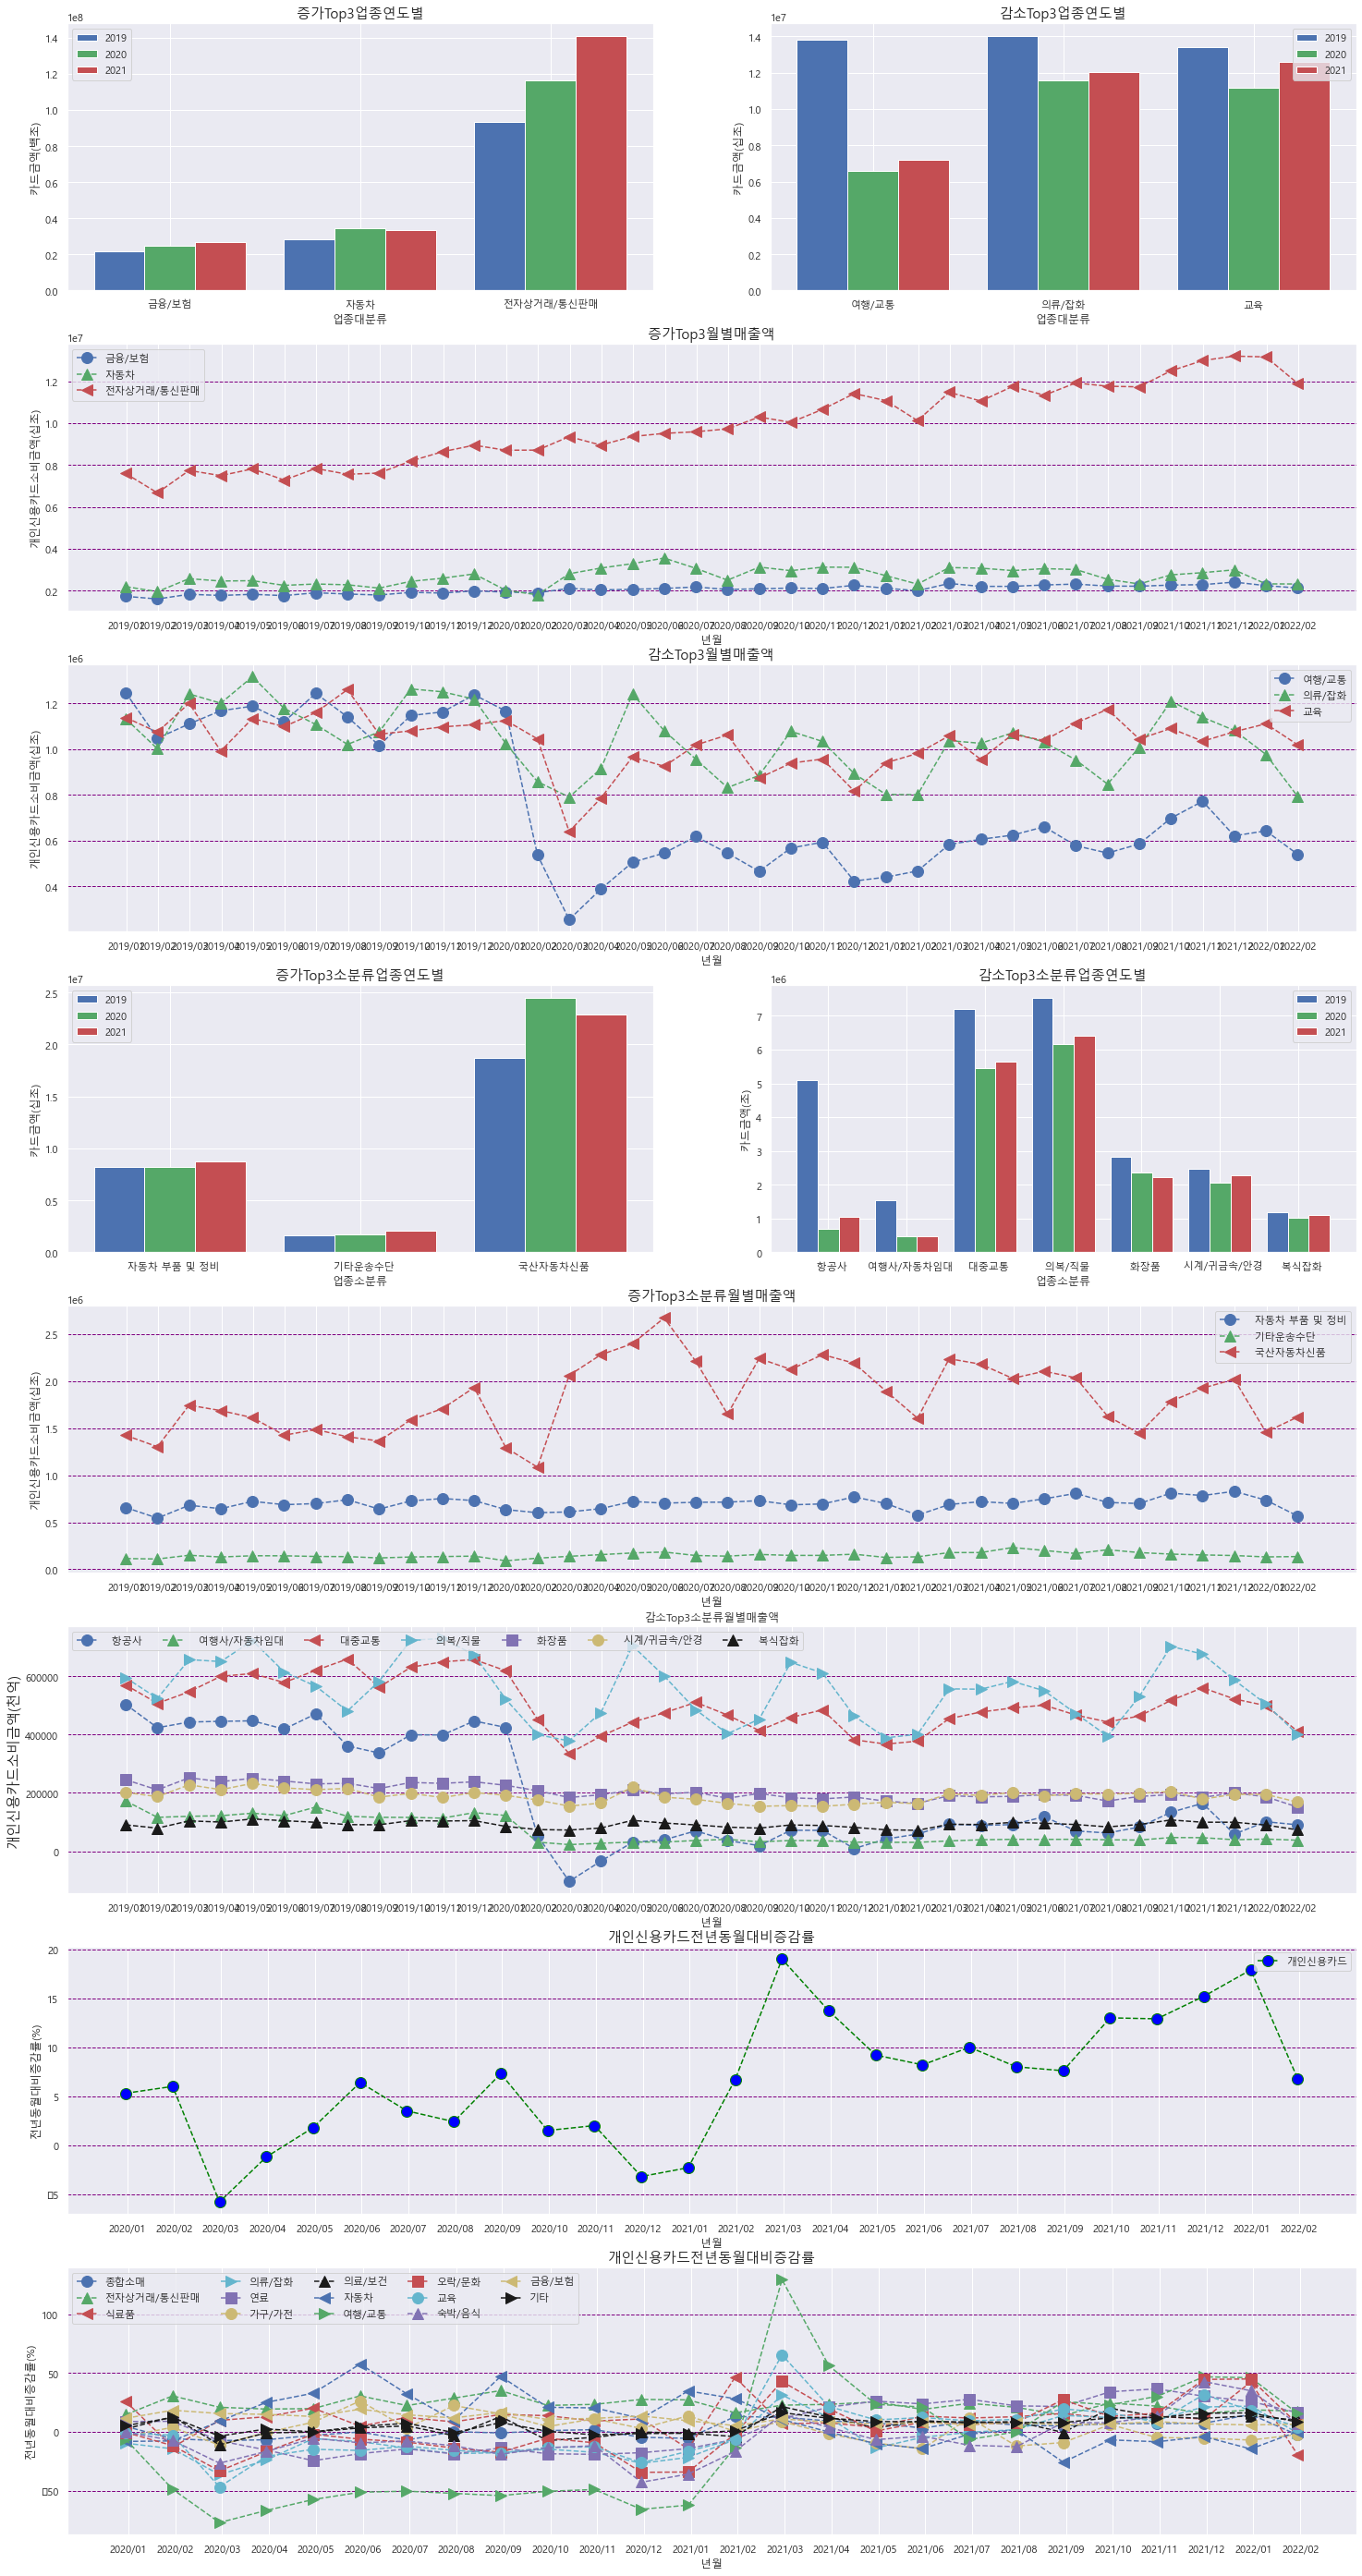

In [144]:
plt.figure(figsize=(25,50))

plt.subplot(821) 
draw_merc('y')

plt.subplot(822) 
draw_merc('n')

plt.subplot(812) 
draw_merc_mon('y')

plt.subplot(813) 
draw_merc_mon('n')

plt.subplot(827) 
draw_merc_detail('y')

plt.subplot(828) 
draw_merc_detail('n')

plt.subplot(815) 
draw_merc_detail_mon('y')

plt.subplot(816) 
draw_merc_detail_mon('n')

plt.subplot(817) 
draw_yty('n') 

plt.subplot(818) 
draw_yty('y') 

plt.show()